# Descriptive Statistics of Empirical Social Networks

In [1]:
from scipy.stats import bernoulli
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [10]:
def plot_degree_distribution(G):
    degree_sequence = [d for n, d in G.degree()]
    plt.hist(degree_sequence, histtype="step")
    plt.xlabel("Degree $k$")
    plt.ylabel("$P(k)$")
    plt.title("Degree Distribution")

In this task, we will look at basic properties of the social networks
from two different villages in rural India.
These data are part of a much larger dataset that was collected
to study diffusion of micro-finance.
And the findings of this study were published
in an article called, `"The Diffusion of Micro-finance"` in the Journal Science
in 2013.

In short, a census of households was conducted,
and a subset of individuals was asked detailed questions
about the relationships they have with others in the village.
This information was used to create networks for each village.
Basic information for all households and all surveyed individuals
was also collected.

The structure of connections in a network
can be captured in what is known as the `Adjacency matrix` of the network.
If we have n nodes, this is n by n matrix,
where entry ij is one if node i and node j have a tie between them.
Otherwise, that entry is equal to zero.
The graphs we're dealing with are called `undirected`,
which means that a tie between nodes i and j
can just as well be described as a tie between nodes j and i.
Consequently, the adjacency matrix is `symmetric`.
That means that the element ij is always the same as the element ji.

We'll be using the `np.loadtxt` function to read in the file.

In [3]:
A1=np.loadtxt("adj_allVillageRelationships_vilno_1.csv",delimiter=",")
A2=np.loadtxt("adj_allVillageRelationships_vilno_2.csv",delimiter=",")

Our next step will be to convert the adjacency matrices to graph objects.
We will accomplish that by using the `to NetworkX graph` method.

In [4]:
G1=nx.to_networkx_graph(A1)
G2=nx.to_networkx_graph(A2)

Although networks can be quite complex, we can measure some of their properties
using simple numbers.
To get a basic sense of the network size and number of connections,
let's count the number of nodes and the number of edges in the networks.

In addition, each node has a total number of edges, its degree.
Let's also calculate the mean degree for all nodes in the network.

In [5]:
def basic_net_stats(G):
    print("Number of nodes: %d" % G.number_of_nodes())
    print("Number of edges %d" % G.number_of_edges())
    degree_sequence = [d for n, d in G.degree()]
    print("Average degree: %.2f" % np.mean(degree_sequence))

In [7]:
basic_net_stats(G1)

Number of nodes: 843
Number of edges 3405
Average degree: 8.08


In [9]:
basic_net_stats(G2)

Number of nodes: 877
Number of edges 3063
Average degree: 6.99


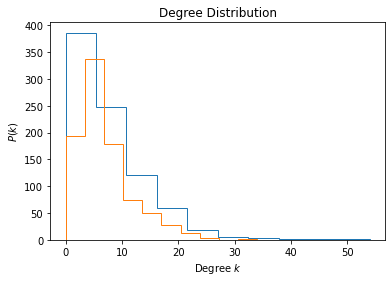

In [12]:
plot_degree_distribution(G1)
plot_degree_distribution(G2)
plt.savefig("village_hist.pdf")

And in this case, we have degree distributions
from the two different villages, shown here, one on top of the other.
Notice how the degree distributions look quite different from what
we observed for the ER networks.
It seems that most people have relatively few connections,
whereas a small fraction of people have a large number of connections.
This distribution doesn't look at all symmetric,
and its tail extends quite far to the right.
This suggests that the ER graphs are likely not good models
for real world social networks.
In practice, we can use ER graphs as a kind of reference graph
by comparing their properties to those of empirical social networks.